In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import scipy.stats

First run without densities to show how it slows stuff down

In [2]:
%%time

k = 5000
ne = 1000
n = 50

s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
_ = s.apply_alternative_layers_and_save_mean_purity(k)

CPU times: user 3min 3s, sys: 2.06 s, total: 3min 5s
Wall time: 8.44 s


In [3]:
%%time

s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
purities, densities = s.apply_alternative_layers_and_save_mean_purity_and_density(k)
D = len(s.get_enumerated_states())

CPU times: user 3min 55s, sys: 4.92 s, total: 4min
Wall time: 29.9 s


Ok pretty slow - and the different between wall and CPU time indicates it really is a single-thread block.

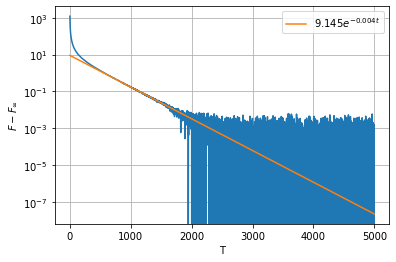

In [22]:
data = D*purities - 1.0

data_subsection = data[750:1500]
regress = scipy.stats.linregress(numpy.arange(750,1500), numpy.log(data_subsection))

pyplot.plot(data)
pyplot.plot(numpy.exp( regress.intercept + regress.slope * numpy.arange(len(data)) ),
            label="${:.3f} e^{{ {:.3f}t }}$".format(numpy.exp(regress.intercept), regress.slope))

pyplot.yscale('log')
pyplot.xlabel('T')
pyplot.ylabel(r'$F - F_\infty$')
pyplot.grid()
pyplot.legend()
pyplot.show()

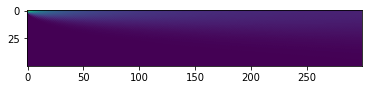

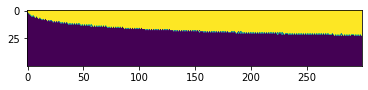

In [5]:
pyplot.imshow(densities[:300,:].T /2.0)
pyplot.show()

pyplot.imshow(densities[:300,:].T /2.0 > 1.0/n)
pyplot.show()

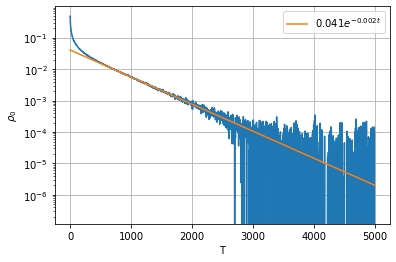

In [6]:
data = densities[:,0] / 2.0 - 1.0/n

data_subsection = data[750:2000]
regress = scipy.stats.linregress(numpy.arange(750,2000), numpy.log(data_subsection))

pyplot.plot(data)
pyplot.plot(numpy.exp( regress.intercept + regress.slope * numpy.arange(len(data)) ), label="${:.3f} e^{{ {:.3f}t }}$".format(numpy.exp(regress.intercept), regress.slope))

pyplot.ylabel(r'$\rho_0$')
pyplot.xlabel('T')
pyplot.yscale('log')
pyplot.grid()
pyplot.legend()
pyplot.show()

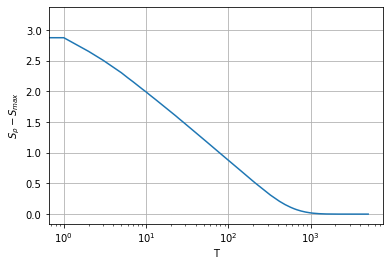

In [7]:
maxS = scipy.stats.entropy(numpy.ones((n,))/n)

pyplot.plot(maxS - scipy.stats.entropy(densities / 2.0, axis=-1))

pyplot.ylabel(r'$S_\rho - S_{max}$')
pyplot.xlabel('T')
pyplot.xscale('log')
pyplot.grid()